# Explode 

In [3]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import datetime as dt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


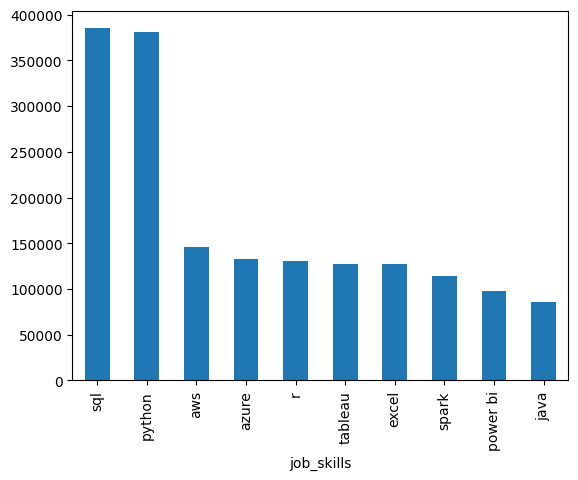

In [17]:
# Explode method: Used to expand a single row into multiple rows based on a list in one column

df_exploded = df.explode('job_skills')
df_exploded['job_skills'].value_counts().head(10).plot(kind = 'bar')
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()
df_skills_count = skills_count.reset_index(name = 'skill_count')

df_skills_count = df_skills_count.sort_values(by = 'skill_count', ascending= False)

df_skills_count


,job_title_short,job_skills,skill_count
364,Cloud Engineer,python,3116
237,Cloud Engineer,aws,3075
238,Cloud Engineer,azure,2943
395,Cloud Engineer,sql,2227
317,Cloud Engineer,linux,1637
409,Cloud Engineer,terraform,1607
315,Cloud Engineer,kubernetes,1554
304,Cloud Engineer,java,1217
288,Cloud Engineer,gcp,1200
269,Cloud Engineer,docker,1152


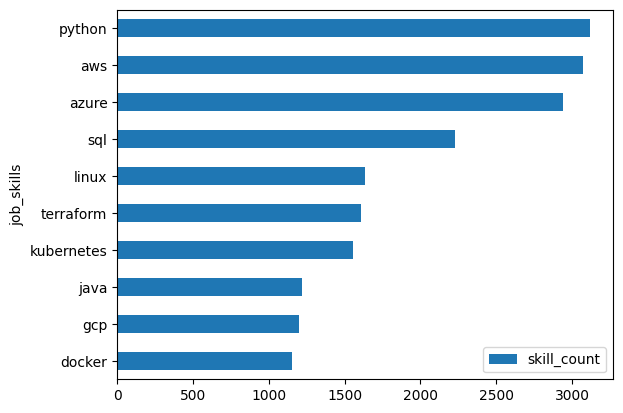

In [37]:
job_title = 'Cloud Engineer'
top_skills = 10

df_skills_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)
display(df_skills_final)
df_skills_final.plot(kind = 'barh', x = 'job_skills', y = 'skill_count')
plt.gca().invert_yaxis()
plt.show()